In [70]:
import sys
import dill as pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src/covid_model_deaths_spline')
from mr_spline import *

MODEL_LABEL = '2020_05_26_cfrmod_5k'

In [71]:
location_id = 541

with open(f'/ihme/covid-19/deaths/dev/{MODEL_LABEL}/models/{location_id}.pkl', 'rb') as fread:
    mr_model = pickle.load(fread)

data_y = mr_model.mr_model.data.obs.values
data_x = mr_model.mr_model.data.covs.iloc[:,1].values
min_val = data_x.min()
max_val = data_x.max()    
x_vals = np.linspace(min_val, max_val, 100)

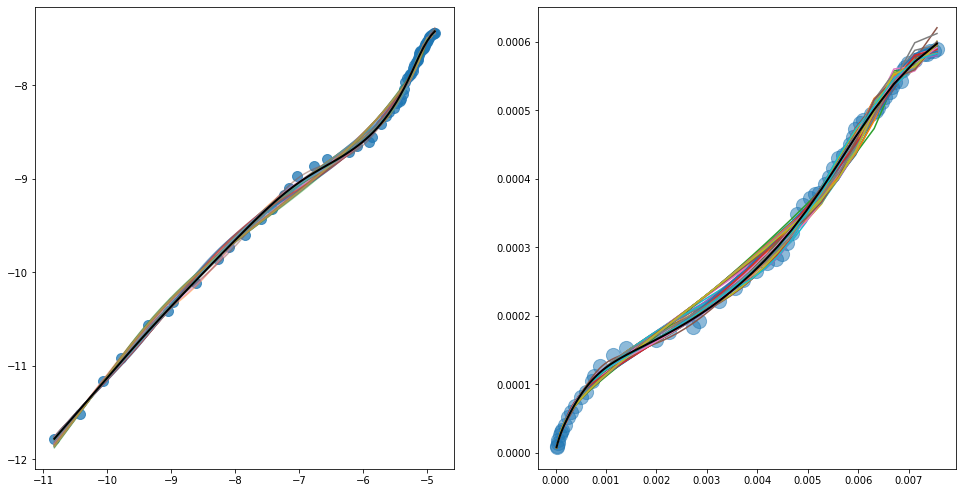

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(16.5, 8.5))
#plt.figure(figsize=(11, 8.5))
overall = []
for knots, model in zip(mr_model.mr_model.ensemble_knots, mr_model.mr_model.sub_models):
    x_mat = model.linear_cov_models[1].spline.design_mat(x_vals)
    betas = model.beta_soln.copy()
    if np.isnan(betas).any():
        raise ValueError('Bad submodel')
    betas[1:] += betas[0]
    overall += [x_mat.dot(betas)]
    ax[0].plot(x_vals, x_mat.dot(betas), alpha=0.5)
    ax[1].plot(np.exp(x_vals), np.exp(x_mat.dot(betas)))
    
overall_fit = (np.array(overall) * np.array([mr_model.mr_model.weights]).T).sum(axis=0)
ax[0].scatter(data_x,
              data_y,
              alpha=0.75, s=100)
ax[0].plot(x_vals, overall_fit, color='black', linewidth=2)
ax[1].scatter(np.exp(data_x),
              np.exp(data_y),
              alpha=0.5, s=200)
ax[1].plot(np.exp(x_vals), 
           np.exp(overall_fit), color='black', linewidth=2)
plt.show()

In [73]:
spline_knots = mr_model.mr_model.ensemble_knots[2]
print(spline_knots)
print(np.quantile(data_x, spline_knots))


[0.         0.05       0.19467829 0.40963738 0.46986714 0.95
 1.        ]
[-10.82815523  -9.7055015   -7.33499536  -5.46518857  -5.36094524
  -4.91177215  -4.88426044]
